In [22]:
import numpy as np
# from numpy import genfromtxt
import matplotlib.pyplot as plt
import random
random.seed(0) # please do not remove this line
%matplotlib inline

def load_data_from_file(fileName = "advertising.csv"):
  data = np.genfromtxt(fileName, dtype=None, delimiter=',', skip_header=1)
  features_X = data[:, :3]
  sales_Y = data[:, 3]

  features_X = np.concatenate((np.ones((features_X.shape[0], 1)), features_X), axis=1)


  return features_X, sales_Y

In [23]:
#Question 2
features_X, _ = load_data_from_file()
print(features_X[:5,:])

[[  1.  230.1  37.8  69.2]
 [  1.   44.5  39.3  45.1]
 [  1.   17.2  45.9  69.3]
 [  1.  151.5  41.3  58.5]
 [  1.  180.8  10.8  58.4]]


In [24]:
#Question 3
_, sales_Y = load_data_from_file()
print(sales_Y.shape)

(200,)


In [25]:
def generate_random_value(bound = 10):
  return (random.random() - 0.5)*bound

def create_individual(n=4, bound=10):

  individual = [generate_random_value() for _ in range(n)]

  return individual

In [26]:
individual = create_individual()
print(individual)

[3.444218515250481, 2.5795440294030247, -0.79428419169155, -2.4108324970703663]


In [27]:
def compute_loss(individual):
    theta = np.array(individual)
    y_hat = features_X.dot(theta)
    loss  = np.multiply((y_hat-sales_Y), (y_hat-sales_Y)).mean()
    return loss

def compute_fitness(individual):

    fitness = 1 / (compute_loss(individual) + 1)

    return fitness

In [28]:
#question 4
features_X, sales_Y = load_data_from_file()
individual = [4.09, 4.82, 3.10, 4.02]
fitness_score = compute_fitness(individual)
print(fitness_score)

1.0185991537088997e-06


In [29]:
def crossover(individual1, individual2, crossover_rate = 0.9):
    individual1_new = individual1.copy()
    individual2_new = individual2.copy()

    for i in range(len(individual1)):
        if random.random() <= crossover_rate:
            individual1_new[i], individual2_new[i] = individual2_new[i], individual1_new[i]

    return individual1_new, individual2_new

In [30]:
#question 5
individual1 = [4.09, 4.82, 3.10, 4.02]
individual2 = [3.44, 2.57, -0.79, -2.41]

individual1, individual2 = crossover(individual1, individual2, 2.0)
print("individual1: ", individual1)
print("individual2: ", individual2)

individual1:  [3.44, 2.57, -0.79, -2.41]
individual2:  [4.09, 4.82, 3.1, 4.02]


In [31]:
def mutate(individual, mutation_rate = 0.05):
    individual_m = individual.copy()

    individual_m = [generate_random_value() if random.random() <= mutation_rate else gene for gene in individual]
    
    return individual_m

In [32]:
#Question 6
before_individual = [4.09, 4.82, 3.10, 4.02]
after_individual = mutate(individual, mutation_rate = 2.0)
print(before_individual == after_individual)

False


In [33]:
def initializePopulation(m):
  population = [create_individual() for _ in range(m)]
  return population

In [34]:
population = initializePopulation(100)
print(len(population))

100


In [35]:
def selection(sorted_old_population, m):
    index1 = random.randint(0, m-1)
    while True:
        index2 = random.randint(0, m-1)
        if (index2 != index1):
            break

    individual_s = sorted_old_population[index2] if index2 > index1 else sorted_old_population[index1]

    return individual_s

In [36]:
population = initializePopulation(m=100)
individual_s = selection(population, m = 100)
print(individual_s)

[-1.7707102346493941, -0.44255615074371035, -1.7485653418675173, -4.711708834619053]


In [37]:
random.seed(0)

In [38]:
def create_new_population(old_population, elitism=2, gen=1):
    m = len(old_population)
    sorted_population = sorted(old_population, key=compute_fitness)

    if gen%1 == 0:
        print("Best loss:", compute_loss(sorted_population[m-1]), "with chromsome: ", sorted_population[m-1])

    new_population = []
    while len(new_population) < m-elitism:
        # selection
        selected_promosome1 = selection(sorted_population, m)
        selected_promosome2 = selection(sorted_population, m)


        # crossover
        crossover_promosome1, crossover_promosome2 = crossover(selected_promosome1, selected_promosome2)

        # mutation

        mutated_promosome1 = mutate(crossover_promosome1)
        mutated_promosome2 = mutate(crossover_promosome2)
        
        new_population.append(mutated_promosome1)
        new_population.append(mutated_promosome2)

        
        # copy elitism chromosomes that have best fitness score to the next generation
    for ind in sorted_population[m-elitism:]:
        new_population.append(ind)


    return new_population, compute_loss(sorted_population[m-1])

In [39]:
#Question 7
individual1 = [4.09, 4.82, 3.10, 4.02]
individual2 = [3.44, 2.57, -0.79, -2.41]
old_population = [individual1, individual2]
new_population, _ = create_new_population(old_population, elitism=2, gen=1)

Best loss: 123415.051528805 with chromsome:  [3.44, 2.57, -0.79, -2.41]


In [40]:
def run_GA():
  n_generations = 100
  m = 600
  features_X, sales_Y = load_data_from_file()
  population = initializePopulation(m)
  losses_list = []
  for i in range(n_generations):

    population, loss = create_new_population(population)
    losses_list.append(loss)

  return losses_list, population

In [41]:
losses_list, population = run_GA()

Best loss: 499.42870543645824 with chromsome:  [3.331600837968306, -0.09720038244186435, 1.449875562942834, -0.2732124726990648]


Best loss: 64.67263189599221 with chromsome:  [1.756290748662368, 0.022221826851781534, -0.13321941847678542, 0.32743718961929735]
Best loss: 64.67263189599221 with chromsome:  [1.756290748662368, 0.022221826851781534, -0.13321941847678542, 0.32743718961929735]
Best loss: 64.67263189599221 with chromsome:  [1.756290748662368, 0.022221826851781534, -0.13321941847678542, 0.32743718961929735]
Best loss: 64.67263189599221 with chromsome:  [1.756290748662368, 0.022221826851781534, -0.13321941847678542, 0.32743718961929735]
Best loss: 55.69404069589749 with chromsome:  [-4.110466087613891, 0.03391352127992131, 0.5878075538667571, -0.05301059713686884]
Best loss: 54.963713550426604 with chromsome:  [4.222958711291984, 0.022221826851781534, -0.13321941847678542, 0.32743718961929735]
Best loss: 36.639004618158566 with chromsome:  [-4.175532773062014, 0.03923197330006567, 0.20225858991120949, 0.16124298167449536]
Best loss: 36.639004618158566 with chromsome:  [-4.175532773062014, 0.0392319733000

Best loss: 719.2973417768833 with chromsome:  [-0.6911151751419387, 0.291332745835412, -0.0583980685263219, -0.8152295489450967]
Best loss: 551.4722379896647 with chromsome:  [-4.1342995000469465, 0.2175851555141195, -0.7534756619023653, -0.2376807824362026]
Best loss: 551.4722379896647 with chromsome:  [-4.1342995000469465, 0.2175851555141195, -0.7534756619023653, -0.2376807824362026]
Best loss: 551.4722379896647 with chromsome:  [-4.1342995000469465, 0.2175851555141195, -0.7534756619023653, -0.2376807824362026]
Best loss: 83.32196119397186 with chromsome:  [2.629057760183615, 0.08683878838675385, 0.5558803130875623, -0.2923167070131216]
Best loss: 71.52738797977658 with chromsome:  [0.8951484720613656, 0.08683878838675385, 0.5558803130875623, -0.2923167070131216]
Best loss: 68.82652490784842 with chromsome:  [1.3795076748338542, 0.08991051519542492, 0.510282202295248, -0.3217671988407389]
Best loss: 32.35075706277607 with chromsome:  [4.3177324228050065, 0.08683878838675385, -0.07958

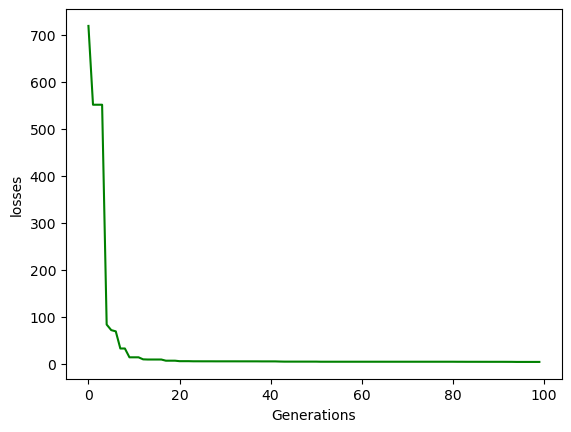

In [42]:
import matplotlib.pyplot as plt

def visualize_loss(losses_list):

      plt.plot(losses_list, c='green')
      plt.xlabel('Generations')
      plt.ylabel('losses')


losses_list, population = run_GA()
visualize_loss(losses_list)

[2.3980481211005533, 0.06566236325754371, 0.1157908864660695, 0.010471673339002008]


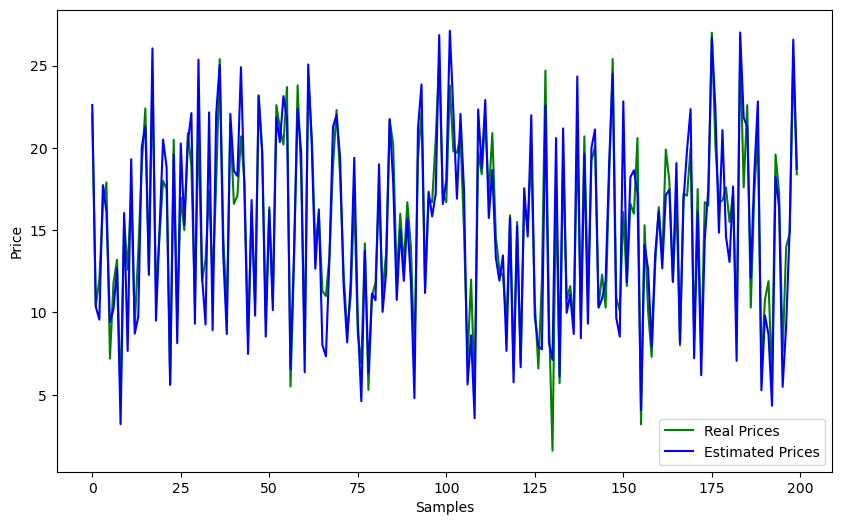

In [43]:
def visualize_predict_gt():
  # visualization of ground truth and predict value
  sorted_population = sorted(population, key=compute_fitness)
  print(sorted_population[-1])
  theta = np.array(sorted_population[-1])

  estimated_prices = []
  for feature in features_X:
    estimated_prices.append(sum(c*x for x, c in zip(feature, theta)))

  fig, ax = plt.subplots(figsize=(10, 6))
  plt.xlabel('Samples')
  plt.ylabel('Price')
  plt.plot(sales_Y, c='green', label='Real Prices')
  plt.plot(estimated_prices, c='blue', label='Estimated Prices')
  plt.legend()
  plt.show()

visualize_predict_gt()

[2.3980481211005533, 0.06566236325754371, 0.1157908864660695, 0.010471673339002008]


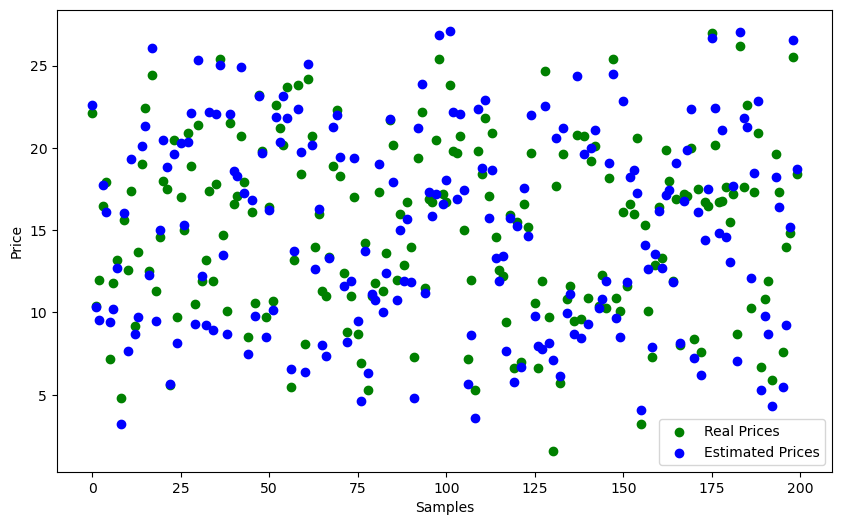

In [44]:
# visualization of ground truth and predict value
sorted_population = sorted(population, key=compute_fitness)
print(sorted_population[-1])
theta = np.array(sorted_population[-1])

estimated_prices = []
samples = [i for i in range(len(features_X))]
for feature in features_X:
    estimated_price = sum(c*x for x, c in zip(feature, theta))
    estimated_prices.append(estimated_price)
fig, ax = plt.subplots(figsize=(10, 6))
# plt.plot(prices, c='green')
# plt.plot(estimated_prices, c='red')
plt.xlabel('Samples')
plt.ylabel('Price')
plt.scatter(samples, sales_Y, c='green', label='Real Prices')
plt.scatter(samples, estimated_prices, c='blue', label='Estimated Prices')
plt.legend()
plt.show()